# Part II - Ford GoBike System Data
## by Waad AlDoaij

## Investigation Overview

> I came to some conclusions following the visualization and exploration.
I discovered that men make up the majority of users, whether they are customers or subscribers, and that the 
Subscriber client was higher than the customer client,The majority of people who use bikes are between the ages of 20 and 40, and they are likely to dislike sharing them. I also learned that the most frequent starting and ending times are usually on weekdays rather than weekends, from seven in the morning until nine in the morning, and from four in the afternoon until six in the evening.  
I might say that there are some issues that I need to fix on and  such as some erroneous data types and some  missing values.

> **Key Insights for Presentation:**
  1. Bikes are most commonly used by individuals between the ages of 20 and 40.
  2. The majority of the user member were men who had huge gab with other users.
  3. increasing bike use between 7~9 in the morning and 4~6 in the evening.
  

## Dataset Overview

> This data set which contains details about each trip taken in a bike-sharing program serving the greater San Francisco Bay area, will be used in this study,
these dataframe following columns are:
(duration_sec, start_time, starting_Day, end_time, ending_Day, start_station_id, start_station_name, start_station_latitude,start_station_longitude, end_station_id, end_station_name,end_station_latitude, end_station_longitude, bike_id, user_type,member_birth_year, member_gender, bike_share_for_all_trip,Hours)


In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [21]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Bike_df_clean.csv')
#Test
df

,duration_sec,start_time,starting_Day,end_time,Ending_Day,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Hours
0,52185,2019-02-28 17:32:10.145,Thursday,2019-03-01 08:01:55.975,Friday,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,17
1,61854,2019-02-28 12:13:13.218,Thursday,2019-03-01 05:24:08.146,Friday,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,12
2,36490,2019-02-28 17:54:26.010,Thursday,2019-03-01 04:02:36.842,Friday,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,17
3,1585,2019-02-28 23:54:18.549,Thursday,2019-03-01 00:20:44.074,Friday,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,23
4,1793,2019-02-28 23:49:58.632,Thursday,2019-03-01 00:19:51.760,Friday,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,23
5,1147,2019-02-28 23:55:35.104,Thursday,2019-03-01 00:14:42.588,Friday,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,23
6,1615,2019-02-28 23:41:06.766,Thursday,2019-03-01 00:08:02.756,Friday,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,23
7,1570,2019-02-28 23:41:48.790,Thursday,2019-03-01 00:07:59.715,Friday,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,23
8,1049,2019-02-28 23:49:47.699,Thursday,2019-03-01 00:07:17.025,Friday,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No,23
9,458,2019-02-28 23:57:57.211,Thursday,2019-03-01 00:05:35.435,Friday,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996,Female,Yes,23


## 1.Common Gender Riders

> The pie-chart below shows the gender of members, which are male with %,74.59 female %23.32 and others %2.08, 
as I indicated the male user is the most frequent user to ride the bike. We can also see a large gap with the other gender.

In [22]:
#Craeting function for chart labals
def functionN(x,y,title):
     plt.xlabel(x , fontsize=14)
     plt.ylabel(y , fontsize=14)
     plt.title(title,fontsize=18)

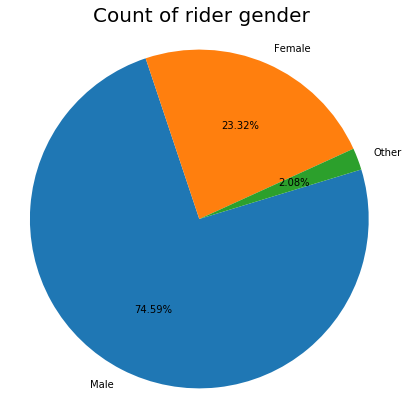

In [23]:
figz(19,7)
member_count = df['member_gender'].value_counts()

plt.pie(member_count  , labels = member_count.index ,startangle = 17, counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Count of rider gender', fontsize= 20);

## 2.Distribution of Bike Usage Per Hour

> According to the graph below, there will be an increase in use between 7 and 9 a.m. and 4 to 6 p.m.
I believe it is because of their daily journey to go and back from work.

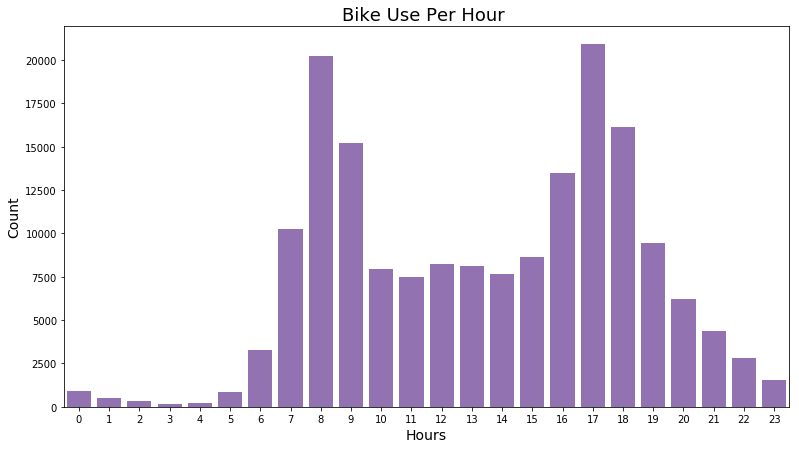

In [24]:
figz(13,7)
p = sb.color_palette()[4]
sb.countplot(data = df, x = 'Hours', color = p )

functionN('Hours', 'Count','Bike Use Per Hour ')

## 3. User Gender Based On Ages
The chart below shows that all gender members are increasing, particularly between the ages of 20 and 40.


In [25]:
#Returning the ages 
ages = 2019 - df.member_birth_year

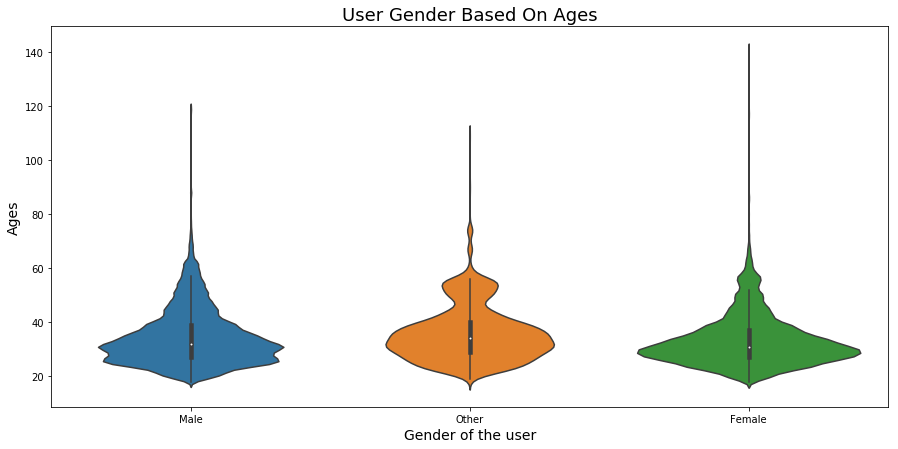

In [26]:
figz(15,7)

sb.violinplot(data=df,x='member_gender',y= ages )

functionN('Gender of the user', 'Ages','User Gender Based On Ages')